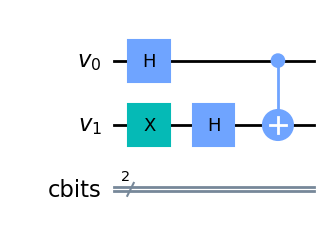

<IPython.core.display.Latex object>

[['0.50-0.00j', '0.50-0.00j', '0.50+0.00j', '0.50-0.00j'], ['-0.50+0.00j', '0.50-0.00j', '0.50+0.00j', '-0.50+0.00j'], ['-0.50+0.00j', '-0.50+0.00j', '0.50+0.00j', '0.50-0.00j'], ['0.50-0.00j', '-0.50+0.00j', '0.50+0.00j', '-0.50+0.00j']]


In [5]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, Aer
from qiskit.visualization import array_to_latex
import numpy as np

vreg = QuantumRegister(2,'v')
cbits_reg = ClassicalRegister(2,'cbits')
qc = QuantumCircuit(vreg,cbits_reg)
qc.x(vreg[1])
qc.h(vreg)
qc.cx(vreg[0],vreg[1])
display(qc.draw('mpl'))

sim = Aer.get_backend('aer_simulator')
qc.save_unitary()
unitary = sim.run(qc).result().get_unitary()
display(array_to_latex(unitary,prefix="\\text{CNOT (MSB as target bit) = }"))
print([['{:.2f}'.format(item) for item in sublist] for sublist in np.array(unitary)])


In [10]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q4 in ['0','1']: 
    for q3 in ['0','1']:
        for q2 in ['0','1']:
            for q1 in ['0','1']:
                for q0 in ['0','1']:
                    all_inputs.append(q4+q3+q2+q1+q0)
#print(all_inputs)  

print("input --> output")
for the_input in all_inputs:
    # create the circuit
    qaux = QuantumRegister(2,"qaux")
    q = QuantumRegister(5,"q")
    c = ClassicalRegister(5,"c")
    qc = QuantumCircuit(q,qaux,c)
    # set the initial value of the circuit w.r.t. the input
    if the_input[0] =='1': qc.x(q[4])
    if the_input[1] =='1': qc.x(q[3])
    if the_input[2] =='1': qc.x(q[2])
    if the_input[3] =='1': qc.x(q[1])
    if the_input[4] =='1': qc.x(q[0])
    #
    # your code is here
    qc.x(q[1])
    qc.x(q[3])
    qc.ccx(q[1],q[2],qaux[0])
    qc.ccx(q[3],q[4],qaux[1])
    qc.ccx(qaux[0],qaux[1],q[0]) #此處錯誤，q0變成目標位元，q1~q4變成控制位元
    qc.ccx(q[1],q[2],qaux[0])
    qc.ccx(q[3],q[4],qaux[1])
    qc.x(q[1])
    qc.x(q[3])
    #
    # measure the main quantum register 
    qc.measure(q,c)
    # execute the circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:4]+" "+the_input[4]+" --> "+the_output[0:4]+" "+the_output[4]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)


input --> output
0000 0 --> 0000 0
0000 1 --> 0000 1
0001 0 --> 0001 0
0001 1 --> 0001 1
0010 0 --> 0010 0
0010 1 --> 0010 1
0011 0 --> 0011 0
0011 1 --> 0011 1
0100 0 --> 0100 0
0100 1 --> 0100 1
0101 0 --> 0101 0
0101 1 --> 0101 1
0110 0 --> 0110 0
0110 1 --> 0110 1
0111 0 --> 0111 0
0111 1 --> 0111 1
1000 0 --> 1000 0
1000 1 --> 1000 1
1001 0 --> 1001 0
1001 1 --> 1001 1
1010 0 --> 1010 1 the output is different than the input
1010 1 --> 1010 0 the output is different than the input
1011 0 --> 1011 0
1011 1 --> 1011 1
1100 0 --> 1100 0
1100 1 --> 1100 1
1101 0 --> 1101 0
1101 1 --> 1101 1
1110 0 --> 1110 0
1110 1 --> 1110 1
1111 0 --> 1111 0
1111 1 --> 1111 1


In [11]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister,execute
from qiskit.providers.aer import AerSimulator

def dj_problem_oracle(problem):
    """Returns a 5-qubit Deutsch-Joza Oracle"""
    qc = QuantumCircuit(5)
    int(problem)
    if problem == 1:
        for q in range(4):
            qc.cx(q, 4)
    elif problem == 2:
        qc.cx(0, 4)
        qc.cx(0, 4)
    elif problem == 3:
        qc.cx(2,4)
    else:
        print("There are only currently 3 oracles in this problem set, returning empty (balanced) gate")
    return qc.to_gate()

n = int(input())
for i in range(n):
    problem =  int(input())
    xreg = QuantumRegister(4,'x')
    yreg = QuantumRegister(1,'y')
    creg = ClassicalRegister(4,'c')
    qc = QuantumCircuit(xreg,yreg,creg)
    qc.h(xreg)
    qc.x(yreg)
    qc.h(yreg)
    qc.barrier()
    qc.append(dj_problem_oracle(problem),range(5))
    qc.barrier()
    qc.h(xreg)
    qc.measure(xreg,creg)
    #display(qc.draw('mpl'))
    sim = AerSimulator()
    job = execute(qc,backend=sim,shots=1000)
    result = job.result()
    counts = result.get_counts(qc)
    for count in counts:
        print(count)

 2
 1


1111


 2


0000
